In [1]:
import numpy as np
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
doc1 = "This is a very good and plain paper. this is really \
good and interesting"
doc2 = "This paper is very interesting, awesome"

In [3]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stop_updated = stopwords.words("english") + list(punctuation) 
    final_word = [term for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [4]:
doc1_clean = clean_txt(doc1)
doc1_clean

'good plain paper really good interesting'

In [5]:
doc2_clean = clean_txt(doc2)
doc2_clean

'paper interesting awesome'

In [6]:
doc = pd.DataFrame([doc1_clean, doc2_clean], columns=["text"])
doc

,text
0,good plain paper really good interesting
1,paper interesting awesome


In [7]:
#CountVectorizer of sklearn gives us the DTM
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
#Instantiating CountVectorizer
count_vect = CountVectorizer()

In [9]:
#Invoking fit_transoform on the CountVectorizer object
X = count_vect.fit_transform(doc['text'])
X

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

- fit -> extarct distinct words to form a bag of words
- transform -> compute the occourrence of every word from the BOW in each document

In [10]:
#Obtaining the BOW's
bow = count_vect.get_feature_names()
bow

['awesome', 'good', 'interesting', 'paper', 'plain', 'really']

In [11]:
#Get the position of every word in the BOW, as a dictionary
print(count_vect.vocabulary_)

{'good': 1, 'plain': 4, 'paper': 3, 'really': 5, 'interesting': 2, 'awesome': 0}


In [12]:
#To get the position of a particular word in BOW
count_vect.vocabulary_['plain']

4

In [13]:
#Printing the document term matrix can be done using toarray() or todense()
#methods
X.toarray()

array([[0, 2, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0]], dtype=int64)

In [14]:
X.todense()

matrix([[0, 2, 1, 1, 1, 1],
        [1, 0, 1, 1, 0, 0]], dtype=int64)

In [15]:
DTM = pd.DataFrame(X.toarray(),columns = count_vect.get_feature_names())
DTM

,awesome,good,interesting,paper,plain,really
0,0,2,1,1,1,1
1,1,0,1,1,0,0


In [16]:
#Term document matrix or TDM is a transpose of DTM 
#which is used in finding similarity between words
TDM = DTM.T
TDM

,0,1
awesome,0,1
good,2,0
interesting,1,1
paper,1,1
plain,1,0
really,1,0


## ngram analysis
- unigram -> a token comprises of a exactly a single word
- bigram -> a token comprises of exactly two words
- trigram -> a token comprises of eaxctly three words

### The next immediate word(s) are grouped with the current word to form a bigram or a tri-gram
- For example: suppose we have a string " how are you doing"
- unigram :{"how", "are", "you", "doing"}
- bigram: {"how are", "are you", "you doing"}
- trigram:{"how are you", "are you doing"}

### Any combination of unigrams, bigrams and trigrams can be obtained using a Countvectorizer

- By default the vectorizer's in sklearn will perform on unigrams, i.e ngram_range will be set to (1,1)
- to extarct bigrams ngram_range = (2,2)
- to extract trigrams ngram_range = (3,3)
- To extract both unigrams and bigrams ngram_range = (1,2)

In [18]:
# A token is called as a bigram if its min and max length is 2
count_vect_bg = CountVectorizer(ngram_range=(2,2))

In [19]:
X_bg = count_vect_bg.fit_transform(doc['text'])

In [20]:
print(count_vect_bg.get_feature_names())

['good interesting', 'good plain', 'interesting awesome', 'paper interesting', 'paper really', 'plain paper', 'really good']


In [21]:
DTM_bg = pd.DataFrame(X_bg.toarray(),
                      columns=count_vect_bg.get_feature_names())
DTM_bg

,good interesting,good plain,interesting awesome,paper interesting,paper really,plain paper,really good
0,1,1,0,0,1,1,1
1,0,0,1,1,0,0,0


In [22]:
count_vect_ubg = CountVectorizer(ngram_range=(1,2))

In [23]:
X_ubg = count_vect_ubg.fit_transform(doc['text'])

In [24]:
print(count_vect_ubg.get_feature_names())

['awesome', 'good', 'good interesting', 'good plain', 'interesting', 'interesting awesome', 'paper', 'paper interesting', 'paper really', 'plain', 'plain paper', 'really', 'really good']


In [25]:
DTM_ubg = pd.DataFrame(X_ubg.toarray(),
                      columns=count_vect_ubg.get_feature_names())
DTM_ubg

,awesome,good,good interesting,good plain,interesting,interesting awesome,paper,paper interesting,paper really,plain,plain paper,really,really good
0,0,2,1,1,1,0,1,0,1,1,1,1,1
1,1,0,0,0,1,1,1,1,0,0,0,0,0


 ### Setting max features
 
 1. your vectorizer's take another argument called max_features where in you can specify the top n features to be selected
 2. on your DTM, if you perfrom column sum, you will get the total No. of occourrence of a word accross all the documents

In [26]:
#Get the top 3 features in our DTM based on their frequencies
#accross all the documents in the corpus by taking a column sum of all the words in the DTM
count_nfeatures = CountVectorizer(max_features=3)

In [27]:
X_nfeatures = count_nfeatures.fit_transform(doc['text'])

In [28]:
count_nfeatures.get_feature_names()

['good', 'interesting', 'paper']

In [29]:
DTM_nfeatures = pd.DataFrame(X_nfeatures.toarray(),
                            columns=count_nfeatures.get_feature_names())
DTM_nfeatures

,good,interesting,paper
0,2,1,1
1,0,1,1


In [30]:
# Get the DTM for all the trigrams - CountVectorizer(ngram_range=(3,3))

### TFIDF

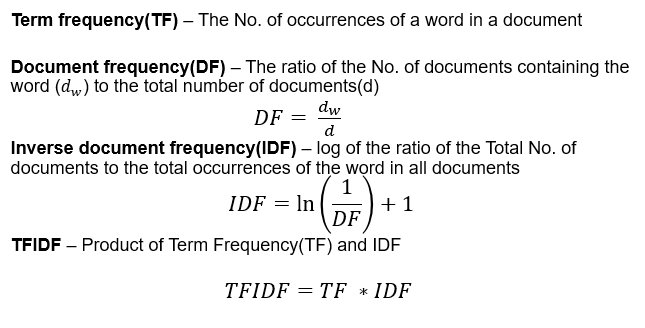

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vect = TfidfVectorizer()

In [33]:
X = tfidf_vect.fit_transform(doc['text'])

In [34]:
tfidf = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names())
tfidf

,awesome,good,interesting,paper,plain,really
0,0.000000,0.755256,0.268685,0.268685,0.377628,0.377628
1,0.704909,0.000000,0.501549,0.501549,0.000000,0.000000


### Cosine Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
cs = cosine_similarity(DTM)
cs

array([[1.        , 0.40824829],
       [0.40824829, 1.        ]])

In [37]:
cs_words = cosine_similarity(DTM.T)

In [38]:
sim_mat = pd.DataFrame(cs_words,columns=DTM.columns,index=DTM.columns)
sim_mat

,awesome,good,interesting,paper,plain,really
awesome,1.000000,0.000000,0.707107,0.707107,0.000000,0.000000
good,0.000000,1.000000,0.707107,0.707107,1.000000,1.000000
interesting,0.707107,0.707107,1.000000,1.000000,0.707107,0.707107
paper,0.707107,0.707107,1.000000,1.000000,0.707107,0.707107
plain,0.000000,1.000000,0.707107,0.707107,1.000000,1.000000
really,0.000000,1.000000,0.707107,0.707107,1.000000,1.000000
